## IPython Parallel Computing Environment

IPython's parallel computing environment builds on the concept of ipython engines and controllers, that one can connect to and submit tasks to. To get started using this framework for parallel computing, first start up an IPython cluster of engines from the "Clusters" tab on the IPython notebook dashboard page.

Results can be stored in a database - set the following in your ipcontroller_config.py:

    c.HubFactory.db_class = "MongoDB"
    c.HubFactory.db_class = "SQLiteDB"

## References

- http://nbviewer.ipython.org/gist/jtriley/3866987

In [1]:
# setup

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.parallel import Client

# function to visualize task execution time
def visualize_tasks(data):
    dt = np.array(data)
    fig, ax = plt.subplots(figsize=(18, dt.shape[1]))

    yticks = []
    tmin = min(dt[:,1])

    for n, pid in enumerate(np.unique(dt[:,0])):
        yticks.append(n)
        for m in np.where(dt[:,0] == pid)[0]:
            if dt[m,3]:
                color = 'red'
            else:
                color = 'green'
            ax.add_patch(plt.Rectangle((dt[m,1] - tmin, n-0.25),
                         dt[m,2] - dt[m,1], 0.5, color=color, alpha=0.5))

    ax.set_ylim(-.5, n+.5)
    ax.set_xlim(0, max(dt[:,2]) - tmin + 0.)
    ax.set_yticks(yticks)
    ax.set_xlabel("seconds")

In [2]:
cli = Client()
lbv = cli.load_balanced_view()

@lbv.parallel(block=True)
def test(delay):
    """A dummy test that takes 'delay' seconds betwen subsequent tests and 1 second to complete."""
    import os, time

    pid = os.getpid()
    time.sleep(delay)
    t0 = time.time()

    time.sleep(1)
    err = False
    
    return [pid, t0, time.time(), err]

cli.ids

[0, 1, 2, 3, 4, 5, 6]

[[2771, 1398542971.15241, 1398542972.153396, False], [2776, 1398542972.159731, 1398542973.160774, False], [2777, 1398542973.165549, 1398542974.166262, False]]


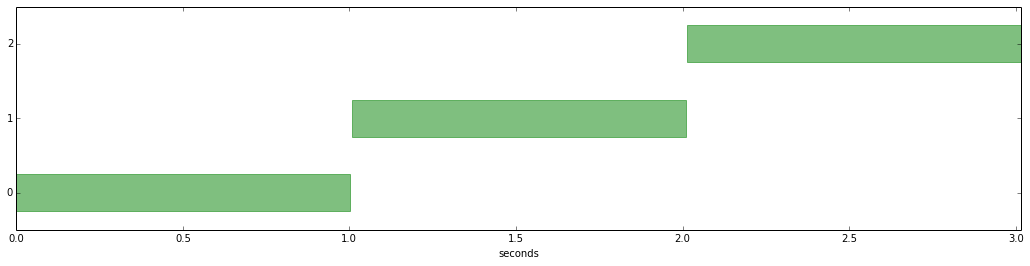

In [3]:
data = test.map([1, 2, 3])
print(data)
visualize_tasks(data)

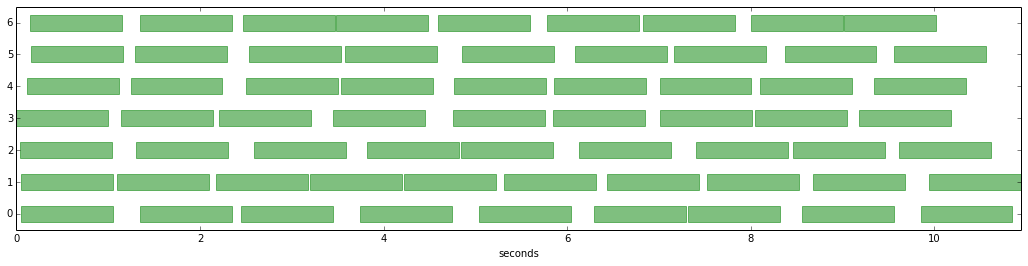

In [4]:
delay_times = np.random.rand(64) * 0.3
visualize_tasks(test.map(delay_times))

In [5]:
%%px --targets ::2 --noblock 
print "I am even"

<AsyncResult: finished>

In [6]:
%pxresult

[stdout:0] I am even
[stdout:2] I am even
[stdout:4] I am even
[stdout:6] I am even
